In [2]:
import numpy as np
import pandas as pd

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
import plotly.express as px
# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

In [3]:
df = pd.read_csv('2023_LoL_esports_match_data_from_OraclesElixir.csv')
df

C:\Users\wrzol\anaconda3\envs\dsc80\lib\site-packages\IPython\core\interactiveshell.py:3460: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125899,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125900,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125901,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125902,10659-10659_game_4,partial,https://lpl.qq.com/es/stats.shtml?bmid=10659,DCup,2023,NaN,0,2023-12-31 11:48:06,4,13.24,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning:

In [4]:
#find the complete data
df["datacompleteness"].value_counts()

complete    105924
partial      19980
Name: datacompleteness, dtype: int64

In [5]:
complete_data= df[df["datacompleteness"]== 'complete']
complete_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125407,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2,13.22,...,135.0,131.0,66.0,4.0,1.0,0.0,0.0,1.0,2.0,0.0
125408,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2,13.22,...,129.0,-381.0,1106.0,13.0,0.0,0.0,1.0,3.0,0.0,1.0
125409,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2,13.22,...,27.0,-142.0,-769.0,-6.0,0.0,0.0,1.0,0.0,3.0,0.0
125410,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2,13.22,...,515.0,-660.0,-1568.0,-34.0,4.0,7.0,2.0,2.0,0.0,4.0


In [6]:
#positions
complete_data['position'].unique()

array(['top', 'jng', 'mid', 'bot', 'sup', 'team'], dtype=object)

In [7]:
#I choose to use the agregate data which is team instead of other specific position
team_data = complete_data[complete_data['position'] == 'team']
team_data

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
10,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,535.0,-530.0,-1671.0,-37.0,0.0,0.0,1.0,1.0,1.0,0.0
11,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,498.0,530.0,1671.0,37.0,1.0,1.0,0.0,0.0,0.0,1.0
22,ESPORTSTMNT06_2754023,complete,NaN,LFL2,2023,Spring,0,2023-01-10 18:15:01,1,13.01,...,532.0,673.0,530.0,-34.0,4.0,6.0,3.0,3.0,4.0,4.0
23,ESPORTSTMNT06_2754023,complete,NaN,LFL2,2023,Spring,0,2023-01-10 18:15:01,1,13.01,...,498.0,-673.0,-530.0,34.0,3.0,4.0,4.0,4.0,6.0,3.0
34,ESPORTSTMNT06_2755035,complete,NaN,LFL2,2023,Spring,0,2023-01-10 19:20:51,1,13.01,...,452.0,-1901.0,-763.0,58.0,2.0,1.0,4.0,4.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125387,ESPORTSTMNT01_3438649,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 17:50:57,3,13.22,...,521.0,31.0,1299.0,19.0,4.0,13.0,2.0,1.0,3.0,4.0
125398,ESPORTSTMNT01_3436660,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:05:47,1,13.22,...,461.0,-75.0,545.0,54.0,3.0,4.0,5.0,5.0,9.0,3.0
125399,ESPORTSTMNT01_3436660,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:05:47,1,13.22,...,515.0,75.0,-545.0,-54.0,5.0,9.0,3.0,3.0,4.0,5.0
125410,ESPORTSTMNT01_3438678,complete,NaN,NEXO,2024,Split 1,0,2023-11-20 19:59:21,2,13.22,...,515.0,-660.0,-1568.0,-34.0,4.0,7.0,2.0,2.0,0.0,4.0


In [8]:
#find the data for 15 miniutes mark
columns_with_15 = [col for col in team_data.columns if '15' in col]
columns_with_15

['goldat15',
 'xpat15',
 'csat15',
 'opp_goldat15',
 'opp_xpat15',
 'opp_csat15',
 'golddiffat15',
 'xpdiffat15',
 'csdiffat15',
 'killsat15',
 'assistsat15',
 'deathsat15',
 'opp_killsat15',
 'opp_assistsat15',
 'opp_deathsat15']

In [9]:
team_data.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15', 'killsat15',
       'assistsat15', 'deathsat15', 'opp_killsat15', 'opp_assistsat15',
       'opp_deathsat15'],
      dtype='object', length=131)

In [10]:
team_data["killdiffat15"] = team_data['killsat15']-team_data['opp_killsat15']
team_data["assistdiffat15"] = team_data['assistsat15']-team_data['opp_assistsat15']
team_data["deathdiffat15"] = team_data['deathsat15']-team_data['opp_deathsat15']

C:\Users\wrzol\AppData\Local\Temp\ipykernel_24608\3441190771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["killdiffat15"] = team_data['killsat15']-team_data['opp_killsat15']
C:\Users\wrzol\AppData\Local\Temp\ipykernel_24608\3441190771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_data["assistdiffat15"] = team_data['assistsat15']-team_data['opp_assistsat15']
C:\Users\wrzol\AppData\Local\Temp\ipykernel_24608\3441190771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a

In [11]:
#data type for result
team_data['result'].unique()

array([1, 0], dtype=int64)

In [12]:
#choosing the columns for EDA
selected = ['firstblood','firstdragon','firsttower','result','golddiffat15','csdiffat15','xpdiffat15',"killdiffat15","assistdiffat15","deathdiffat15"]

In [13]:
dff=team_data[selected]
dff

,firstblood,firstdragon,firsttower,result,golddiffat15,csdiffat15,xpdiffat15,killdiffat15,assistdiffat15,deathdiffat15
10,0.0,0.0,1.0,1,-530.0,-37.0,-1671.0,-1.0,-1.0,1.0
11,1.0,1.0,0.0,0,530.0,37.0,1671.0,1.0,1.0,-1.0
22,0.0,0.0,0.0,0,673.0,-34.0,530.0,1.0,2.0,-1.0
23,1.0,1.0,1.0,1,-673.0,34.0,-530.0,-1.0,-2.0,1.0
34,0.0,0.0,0.0,1,-1901.0,58.0,-763.0,-2.0,-5.0,2.0
...,...,...,...,...,...,...,...,...,...,...
125387,0.0,1.0,0.0,0,31.0,19.0,1299.0,3.0,10.0,-2.0
125398,1.0,1.0,1.0,1,-75.0,54.0,545.0,-2.0,-5.0,2.0
125399,0.0,0.0,0.0,0,75.0,-54.0,-545.0,2.0,5.0,-2.0
125410,1.0,0.0,0.0,1,-660.0,-34.0,-1568.0,2.0,7.0,-2.0


In [14]:
#finding missing value
missing_counts = dff.isnull().sum()
missing_counts

firstblood        0
firstdragon       0
firsttower        0
result            0
golddiffat15      2
csdiffat15        2
xpdiffat15        2
killdiffat15      2
assistdiffat15    2
deathdiffat15     2
dtype: int64

In [15]:
missing_list = ['golddiffat15','csdiffat15','xpdiffat15','killdiffat15','assistdiffat15','deathdiffat15']
for i in missing_list:
    column_mean = dff[i].mean()
    dff[i] = dff[i].fillna(column_mean)
missing_counts = dff.isnull().sum()
missing_counts


C:\Users\wrzol\AppData\Local\Temp\ipykernel_24608\675367402.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff[i] = dff[i].fillna(column_mean)


firstblood        0
firstdragon       0
firsttower        0
result            0
golddiffat15      0
csdiffat15        0
xpdiffat15        0
killdiffat15      0
assistdiffat15    0
deathdiffat15     0
dtype: int64

In [16]:
dff.describe()

,firstblood,firstdragon,firsttower,result,golddiffat15,csdiffat15,xpdiffat15,killdiffat15,assistdiffat15,deathdiffat15
count,17654.000000,17654.000000,17654.000000,17654.000000,17654.000000,17654.0000,17654.000000,17654.00000,17654.000000,17654.000000
mean,0.499264,0.499830,0.499943,0.499943,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
std,0.500014,0.500014,0.500014,0.500014,3075.916366,39.8683,1907.271833,3.58182,6.702235,3.580855
min,0.000000,0.000000,0.000000,0.000000,-17056.000000,-202.0000,-9580.000000,-20.00000,-33.000000,-20.000000
25%,0.000000,0.000000,0.000000,0.000000,-1923.750000,-26.0000,-1190.000000,-2.00000,-4.000000,-2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1923.750000,26.0000,1190.000000,2.00000,4.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,17056.000000,202.0000,9580.000000,20.00000,33.000000,20.000000


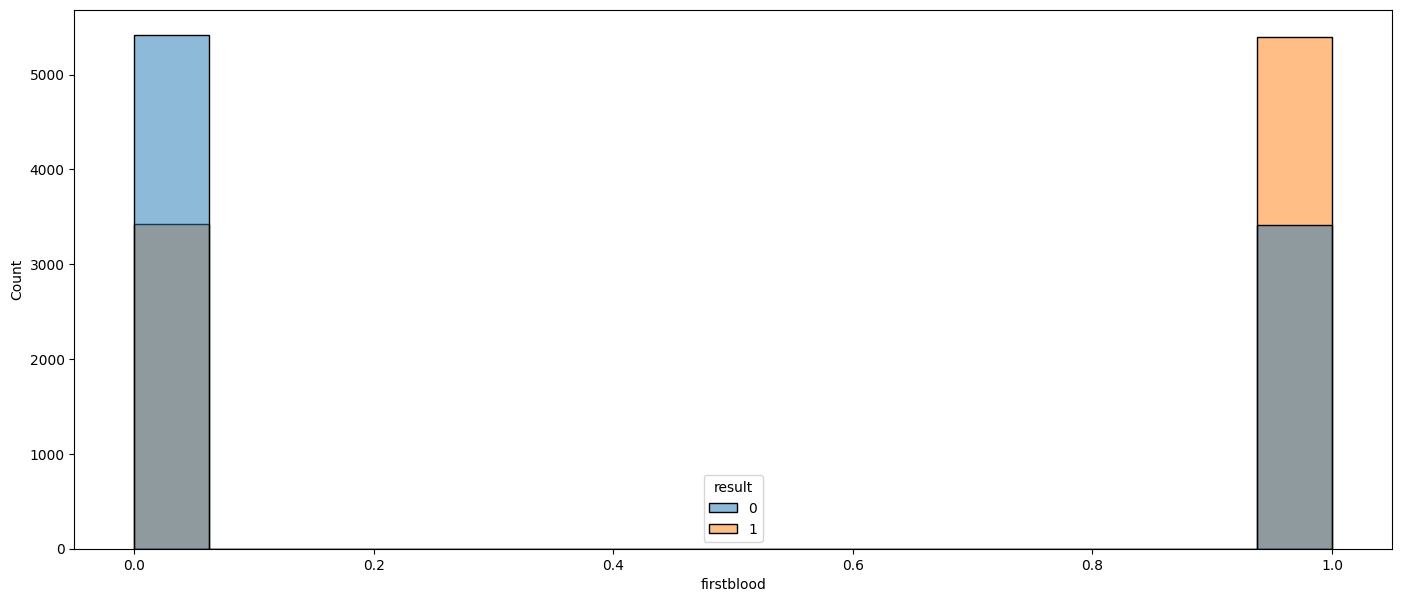

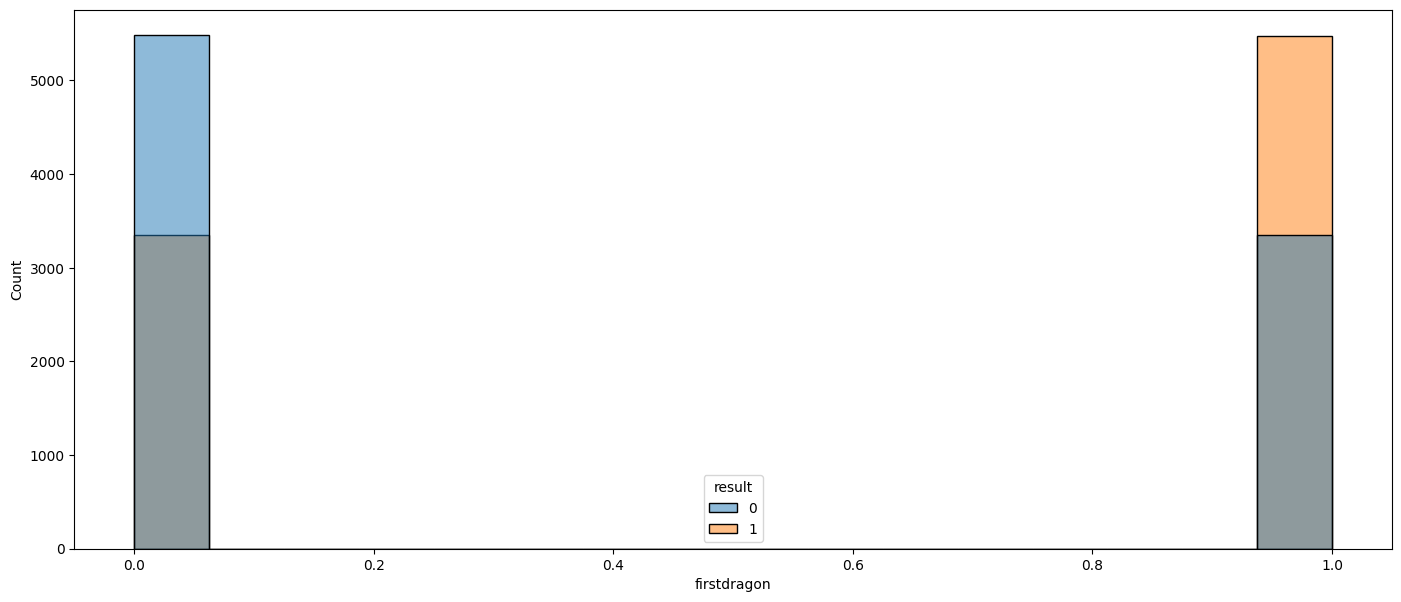

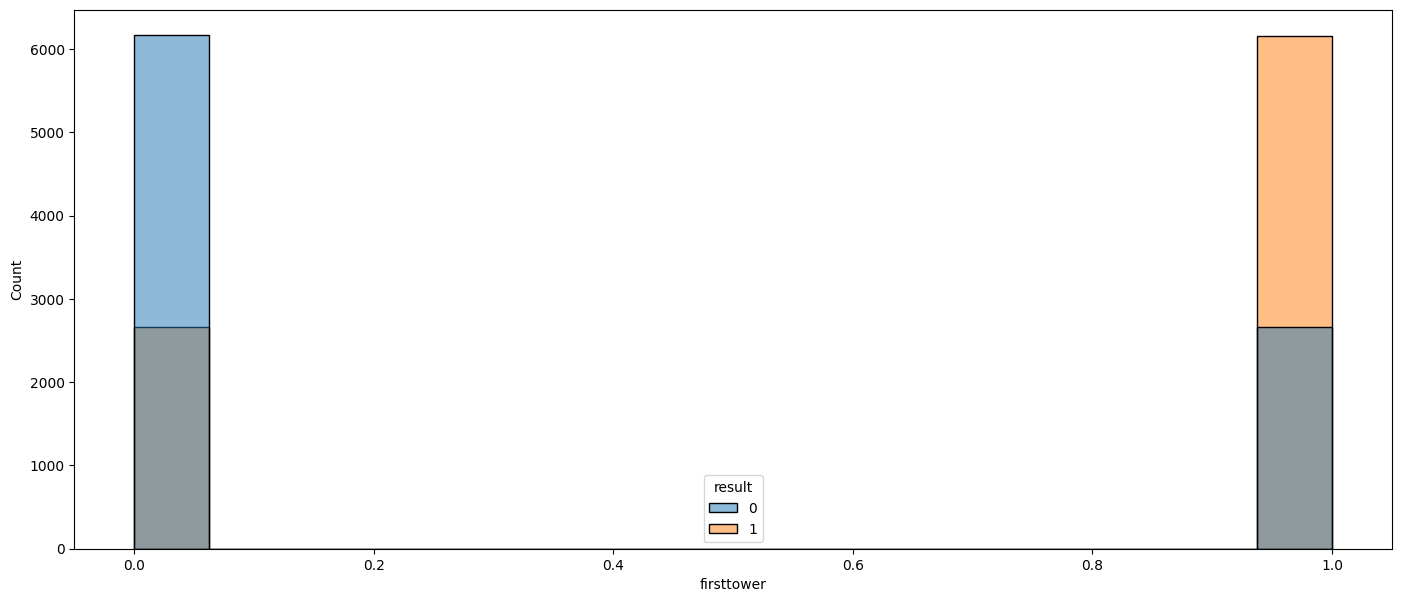

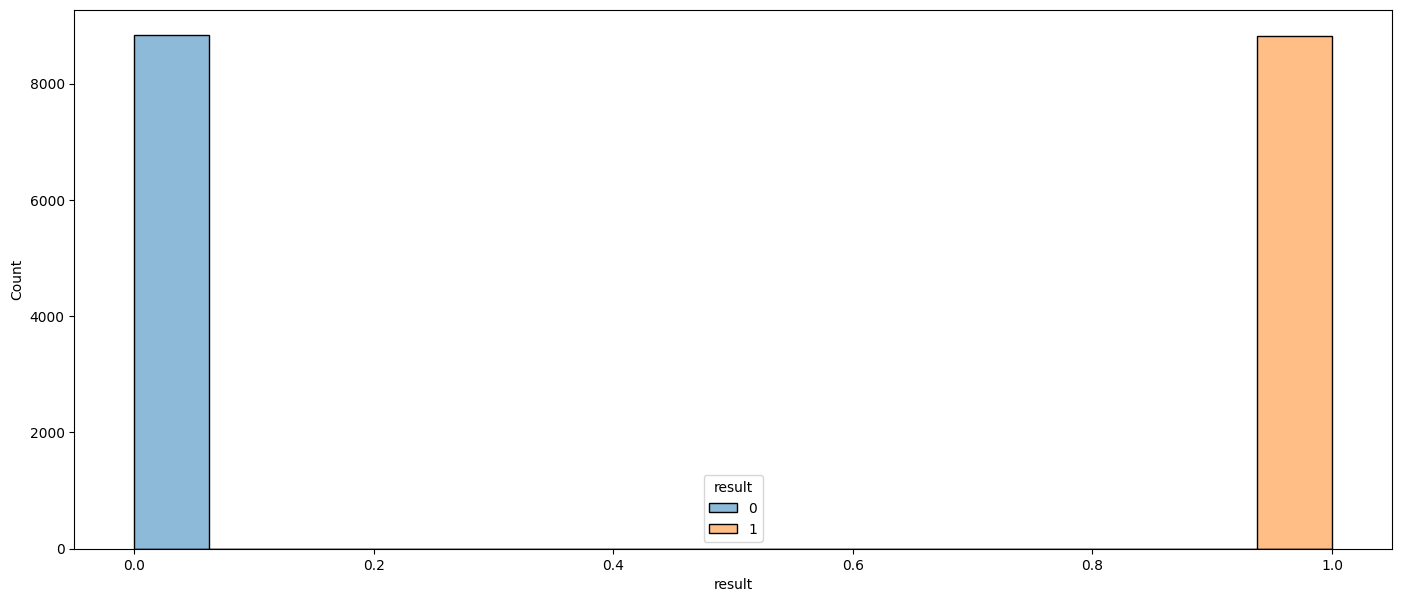

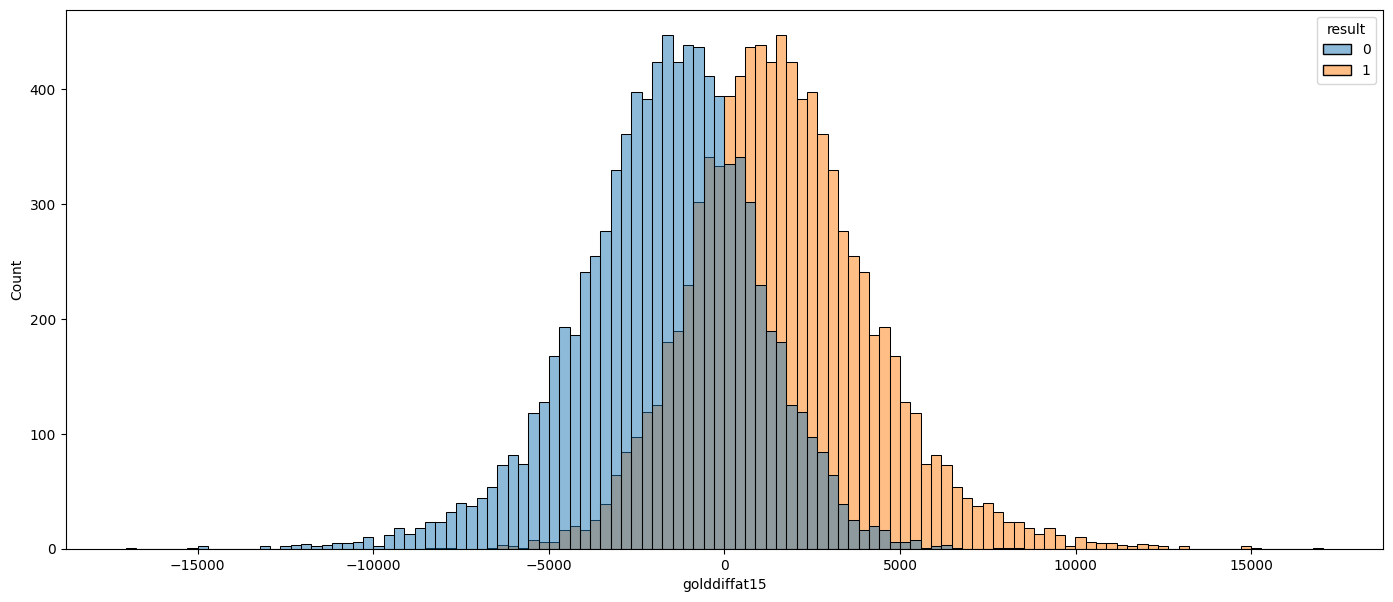

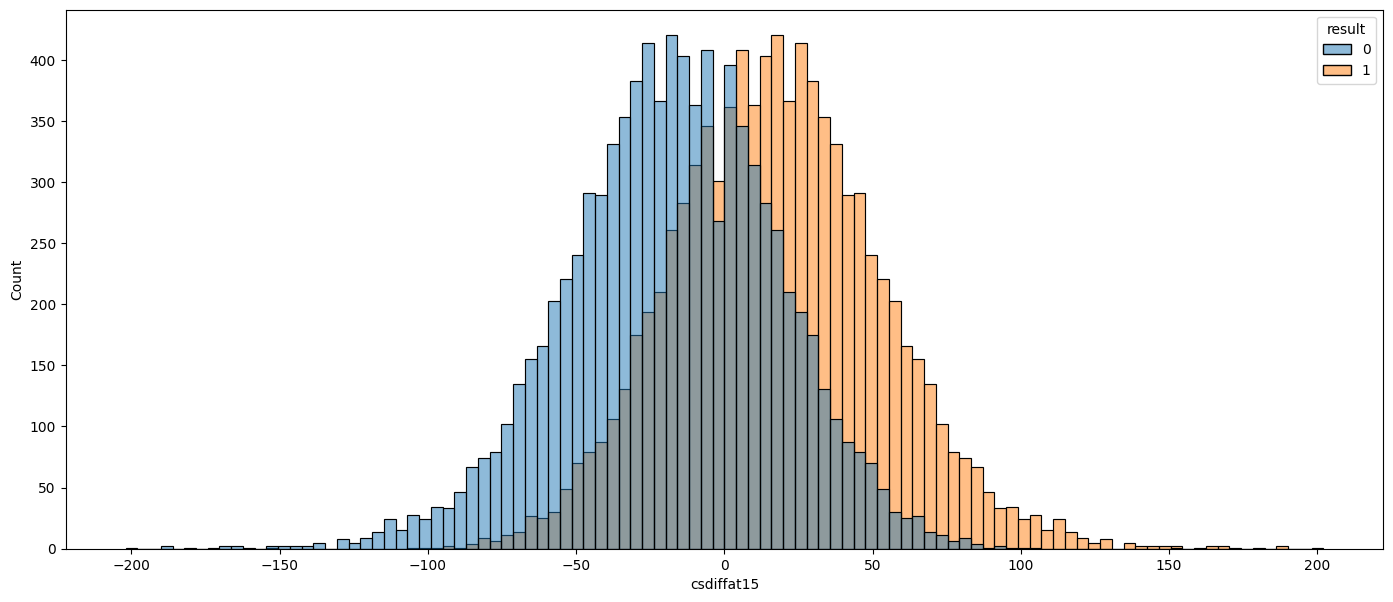

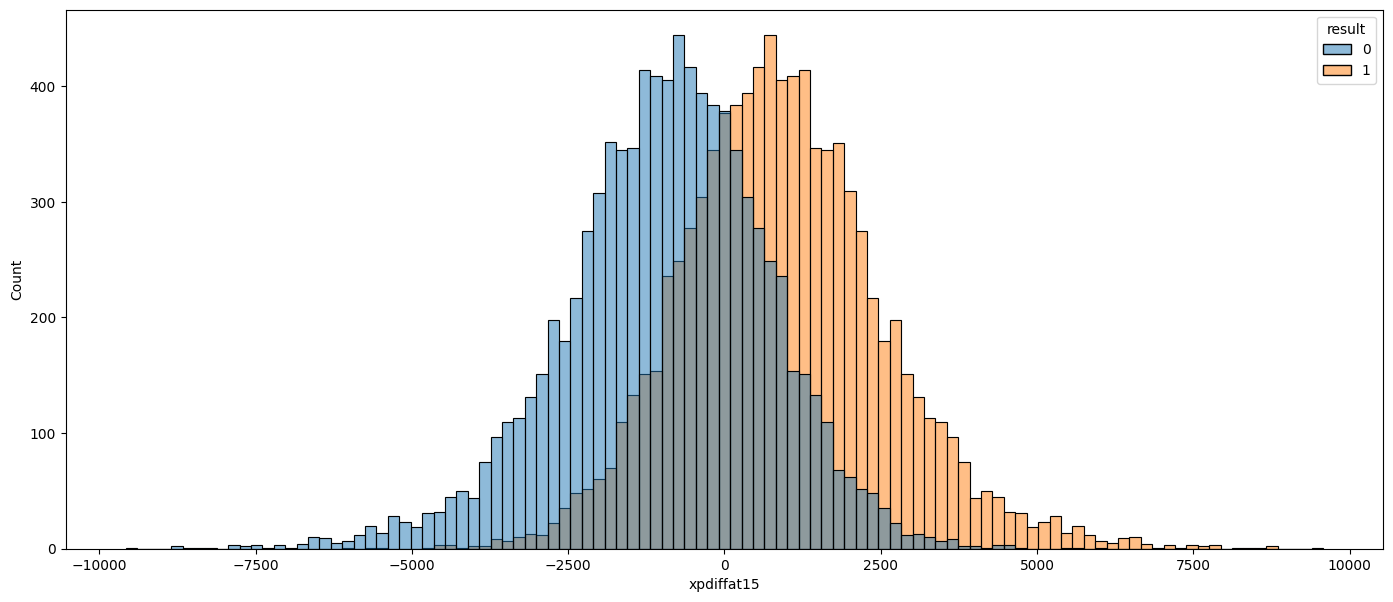

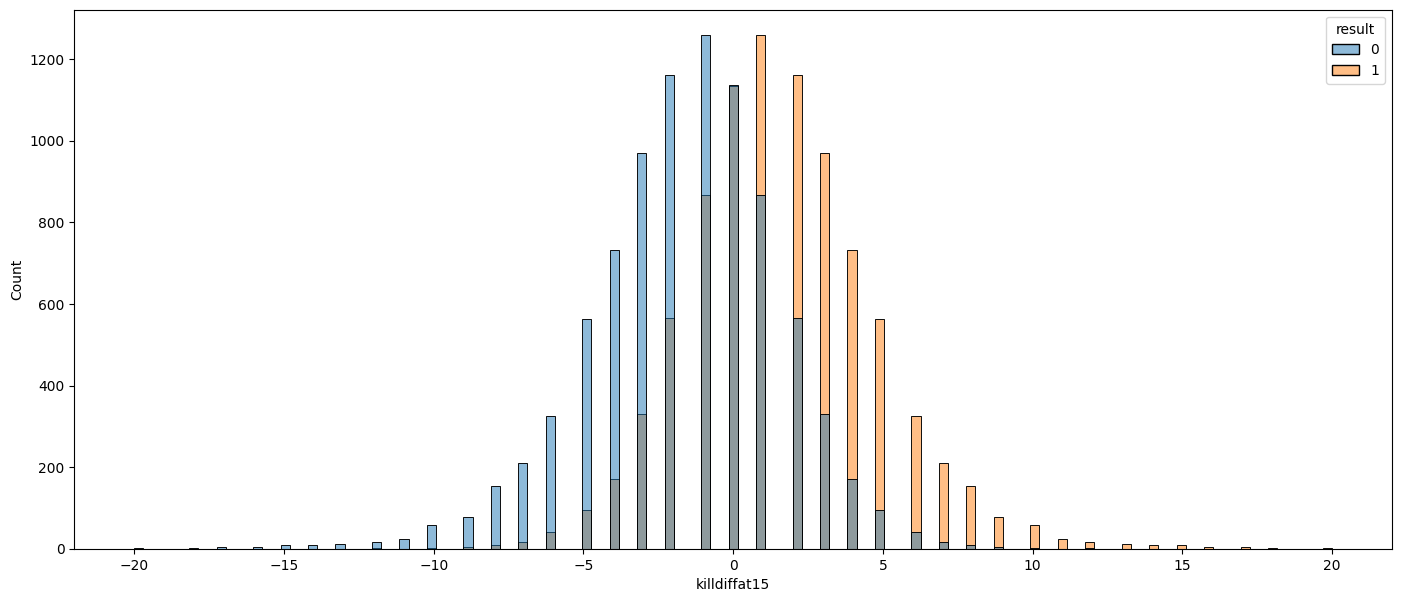

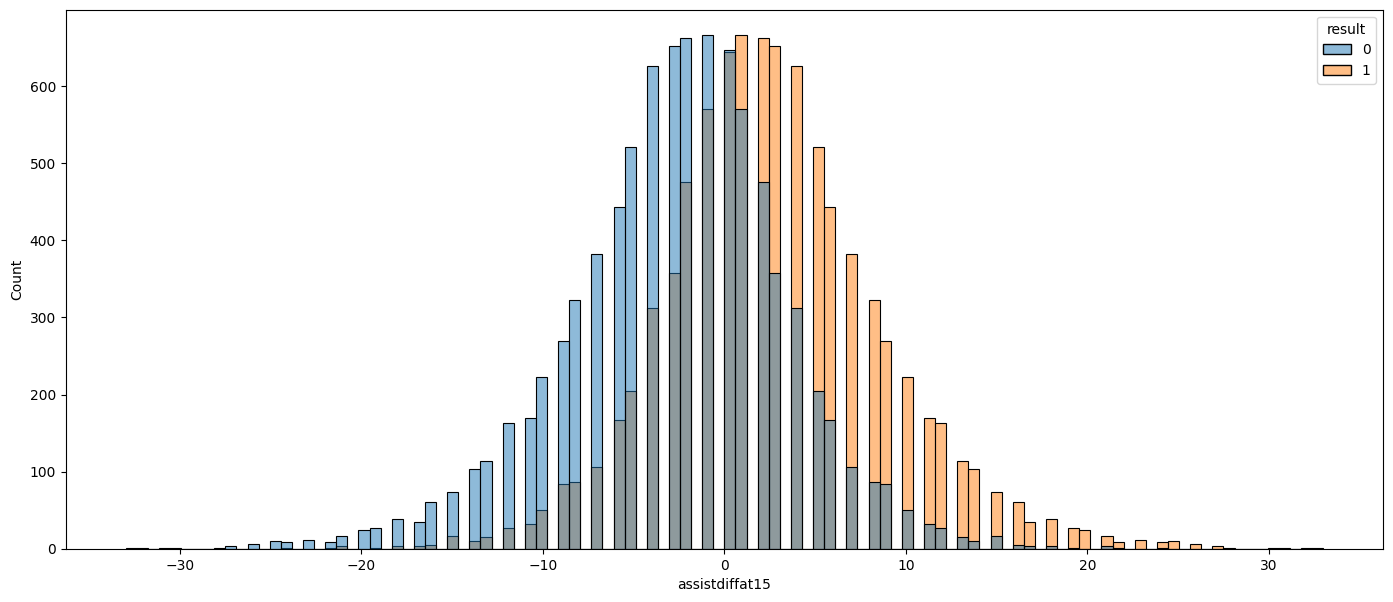

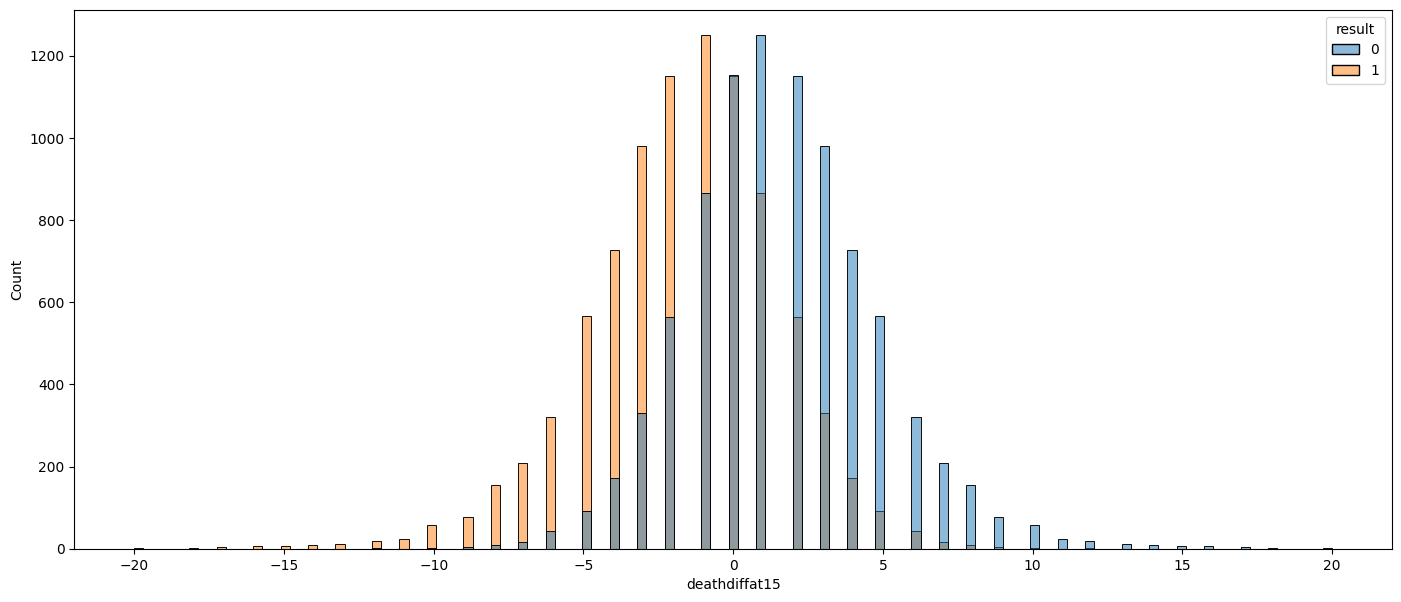

In [17]:
for col in selected:
    sns.histplot(data = dff,x = col, hue = 'result')
    plt.show()

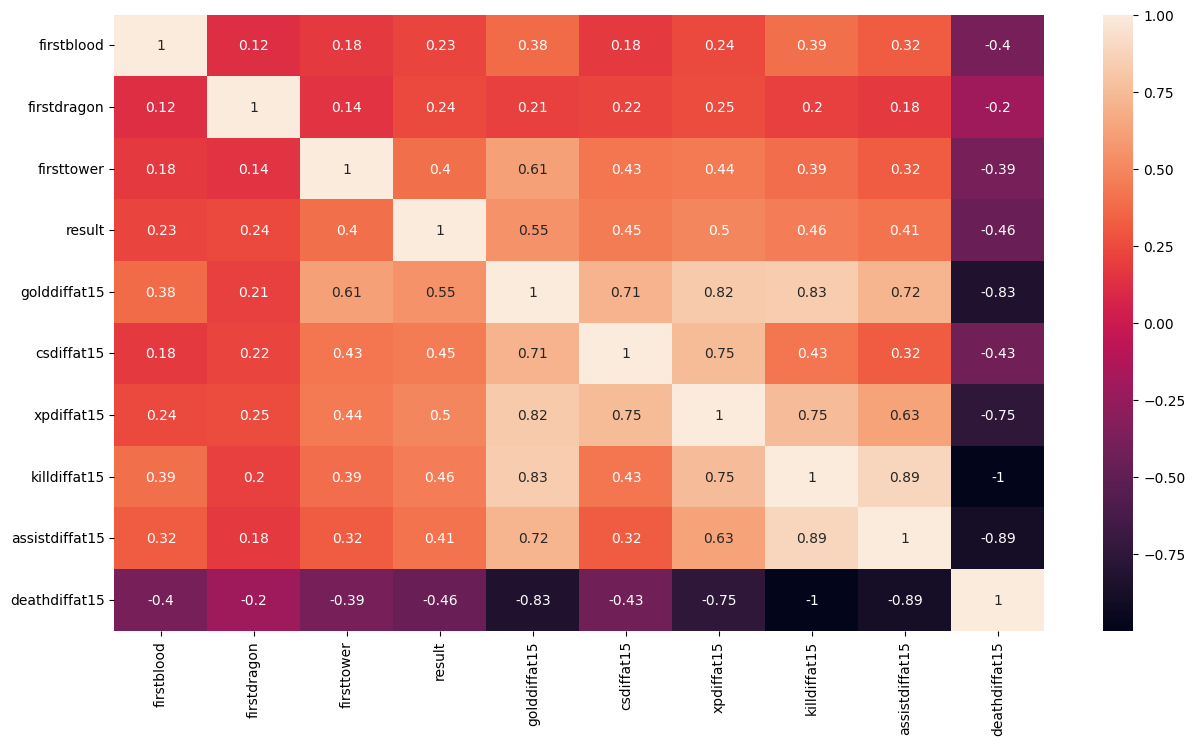

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(dff.corr(), annot = True)
plt.show()

based on the correlation matrix, I find out that golddiffat15 is the most significant factor for a winning game and the second is xp diff

# Baseline model

In [19]:
from sklearn.decomposition import PCA
dff.columns

Index(['firstblood', 'firstdragon', 'firsttower', 'result', 'golddiffat15',
       'csdiffat15', 'xpdiffat15', 'killdiffat15', 'assistdiffat15',
       'deathdiffat15'],
      dtype='object')

In [20]:
dfc = dff.copy()
X = dfc.drop('result',axis = 1)
y = dfc['result']
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.4,random_state=42, shuffle=True)

mode_onehot_pipe = Pipeline([
    ('encoder',SimpleImputer(strategy = 'most frequent')),
    ('one hot encoder', OneHotEncoder(handle_unknown = 'ignore'))
])
transformer = ColumnTransformer([
    ('one hot', OneHotEncoder(handle_unknown='ignore'), ['firstblood', 'firstdragon', 'firsttower','golddiffat15', 'csdiffat15', 'xpdiffat15', "killdiffat15", "assistdiffat15", "deathdiffat15"])  
], remainder='passthrough')


In [21]:
logreg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
svc = SVC(random_state=42)
ada = AdaBoostClassifier(random_state=42)
grad = GradientBoostingClassifier(random_state=42)
logreg_pipe = Pipeline([('transformer', transformer), ('logreg', logreg)])
tree_pipe = Pipeline([('transformer', transformer), ('tree', tree)])
knn_pipe = Pipeline([('transformer', transformer), ('knn', knn)])
rf_pipe = Pipeline([('transformer', transformer), ('rf', rf)])
svc_pipe = Pipeline([('transformer', transformer), ('svc', svc)])
ada_pipe = Pipeline([('transformer', transformer), ('ada', ada)])
grad_pipe = Pipeline([('transformer', transformer), ('grad', grad)])
for model in [logreg_pipe,tree_pipe,knn_pipe,rf_pipe,svc_pipe,ada_pipe,grad_pipe]:
    model.fit(X_train,y_train)

C:\Users\wrzol\anaconda3\envs\dsc80\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVC': SVC(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}
accuracy_scores = {}

for name, model in models.items():
    pipeline = Pipeline([('transformer', transformer), ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy_scores[name] = accuracy_score(y_test, y_pred)

acc_summary = pd.DataFrame(list(accuracy_scores.items()), columns=['Method', 'Accuracy'])

print(acc_summary)

C:\Users\wrzol\anaconda3\envs\dsc80\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                Method  Accuracy
0  Logistic Regression  0.743840
1        Decision Tree  0.702917
2                  KNN  0.705607
3        Random Forest  0.735344
4                  SVC  0.744548
5             AdaBoost  0.739309
6    Gradient Boosting  0.740300


In [23]:
from sklearn.metrics import f1_score
for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe, svc_pipe, ada_pipe, grad_pipe]:
    model_name = model.steps[-1][0]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(y_test, y_pred, average='binary') 
    
    print(f"{model_name} F1 score: {f1:.4f}")

C:\Users\wrzol\anaconda3\envs\dsc80\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logreg F1 score: 0.7415
tree F1 score: 0.7008
knn F1 score: 0.7079
rf F1 score: 0.7355
svc F1 score: 0.7413
ada F1 score: 0.7420
grad F1 score: 0.7401


# Final Model

In [23]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer
from sklearn.model_selection import GridSearchCV



pipeline = Pipeline([
    ('transformer', transformer),
    ('MaxAbsScale', MaxAbsScaler()),
    ('normalize', Normalizer()),  
    ('model', RandomForestClassifier(random_state=42))  
])


param_grid = {
    'model__n_estimators': [150, 200, 250],
    'model__max_depth': [None, 20, 120, 150], 
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'model__max_depth': 150, 'model__n_estimators': 150}
Best score: 0.7417872649141876


Major Take Away: most likely, we could predict the outcome of a LOL match by the first 15 miniutes of the game.

# Interaction

In [24]:
import ipywidgets as widgets
from IPython.display import display
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from ipywidgets import interact


final_model = grid_search.best_estimator_


In [25]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

final_model = grid_search.best_estimator_

y_pred = grad.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

firstblood_widget = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='First Blood:')
firstdragon_widget = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='First Dragon:')
firsttower_widget = widgets.Dropdown(options=[('Yes', 1), ('No', 0)], description='First Tower:')
golddiffat15_widget = widgets.IntText(description='Gold Diff at 15:')
csdiffat15_widget = widgets.IntText(description='CS Diff at 15:')
xpdiffat15_widget = widgets.IntText(description='XP Diff at 15:')
killdiffat15_widget = widgets.IntText(description='Kill Diff at 15:')
assistdiffat15_widget = widgets.IntText(description='Assist Diff at 15:')
deathdiffat15_widget = widgets.IntText(description='Death Diff at 15:')

def make_prediction(b):
    input_data = pd.DataFrame({
        'firstblood': [firstblood_widget.value],
        'firstdragon': [firstdragon_widget.value],
        'firsttower': [firsttower_widget.value],
        'golddiffat15': [golddiffat15_widget.value],
        'csdiffat15': [csdiffat15_widget.value],
        'xpdiffat15': [xpdiffat15_widget.value],
        'killdiffat15': [killdiffat15_widget.value],
        'assistdiffat15': [assistdiffat15_widget.value],
        'deathdiffat15': [deathdiffat15_widget.value]
    })
    prediction = grad.predict(input_data)
    output_widget.value = f"Prediction: {'Win' if prediction[0] == 1 else 'Lose'}\nModel Accuracy: {accuracy:.4f}"


submit_button = widgets.Button(description='Predict Outcome')
submit_button.on_click(make_prediction)


output_widget = widgets.Label()

input_widgets = widgets.VBox([
    firstblood_widget,
    firstdragon_widget,
    firsttower_widget,
    golddiffat15_widget,
    csdiffat15_widget,
    xpdiffat15_widget,
    killdiffat15_widget,
    assistdiffat15_widget,
    deathdiffat15_widget,
    submit_button
])

display(input_widgets, output_widget)

Label(value='')